<a href="https://colab.research.google.com/github/gautamHCSCV/Modelling_Viscoelastic_Objects/blob/main/RF_vs_RBF_vs_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# For Middle range

In [ ]:
path = '/content/drive/MyDrive/Virtual env/Dataset3/'
x1_train = pd.read_csv(path+'data_trainmid_x1.csv')
x2_train = pd.read_csv(path+'data_trainmid_x2.csv')
f1_train = pd.read_csv(path+'data_trainmid_f1.csv')
f1_test = pd.read_csv(path+'data_testmid_f1.csv')
x1_test = pd.read_csv(path+'data_testmid_x1.csv')
x2_test = pd.read_csv(path+'data_testmid_x2.csv')
print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))

112459 62211 112459 62211


In [ ]:
X_train = pd.DataFrame(data = np.concatenate((x1_train,x2_train),axis=1),columns = ['p1','p2'])
X_test = pd.DataFrame(data = np.concatenate((x1_test,x2_test),axis=1),columns = ['p1','p2'])
X_train.head()

,p1,p2
0,-0.0000,-0.0000
1,-0.0159,-0.0000
2,-0.0159,0.0171
3,-0.0159,0.0171
4,-0.0000,0.0329


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
t1 = datetime.now()
rf1 = RandomForestRegressor()
rf1.fit(X_train,f1_train)
t2 = datetime.now()

print('Time taken by Random Forest',t2-t1)

Time taken by Random Forest 0:00:27.049073


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y1_pred = rf1.predict(X_test)
print('Root mean square error: ',sqrt(mean_squared_error(f1_test,y1_pred)))

Root mean square error:  0.07501526382947117


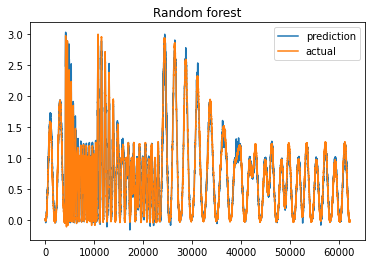

In [ ]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),f1_test, label = 'actual')
plt.legend()
plt.title('Random forest')
plt.show()

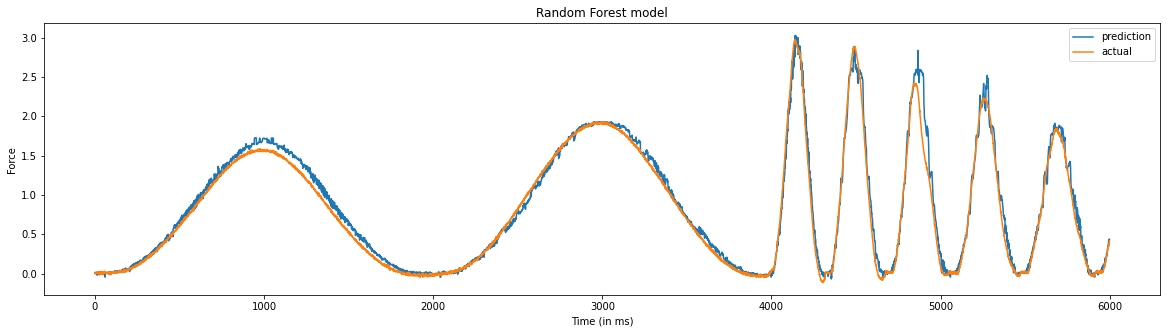

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),f1_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Random Forest model')
plt.show()

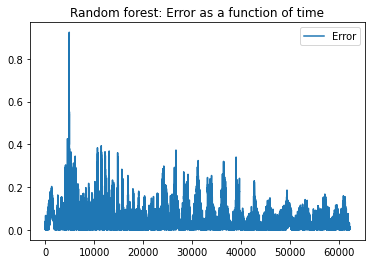

In [ ]:
error = []
for i in range(len(f1_test)):
    error.append(abs(y1_pred[i]-f1_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])

Minimum Error = 9.99999999806711e-07
Maximum Error = 0.9236627500000012
Median Value of Error = 0.034444150000000034


[0.55227 0.44773]


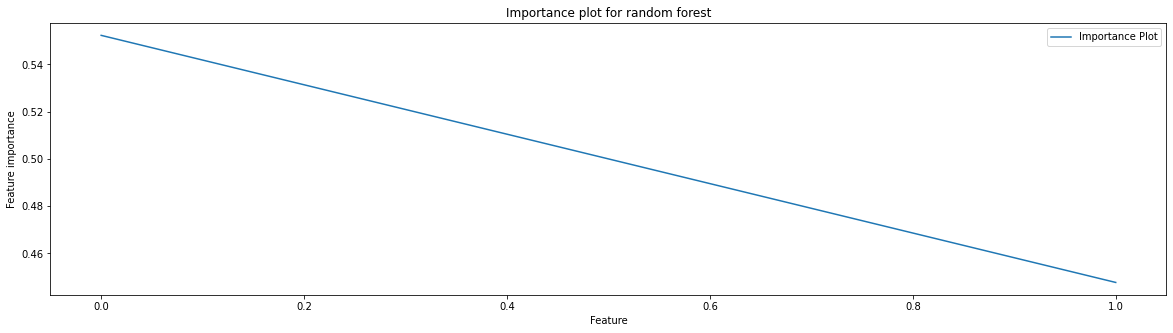

In [ ]:
importances = rf1.feature_importances_
print(importances)
plt.figure(figsize=(20,5))
plt.plot(range(len(importances)),importances, label = 'Importance Plot')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.title('Importance plot for random forest')
plt.show()

## RBF

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
t1 = datetime.now()
clf = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))
clf.fit(X_train,f1_train)
t2 = datetime.now()

print('Time taken by RBF Model: ',t2-t1)

Time taken by RBF Model:  0:01:05.500207


In [ ]:
y1_pred = clf.predict(X_test)
print('Root mean square error: ',sqrt(mean_squared_error(f1_test,y1_pred)))

Root mean square error:  0.055980657133741306


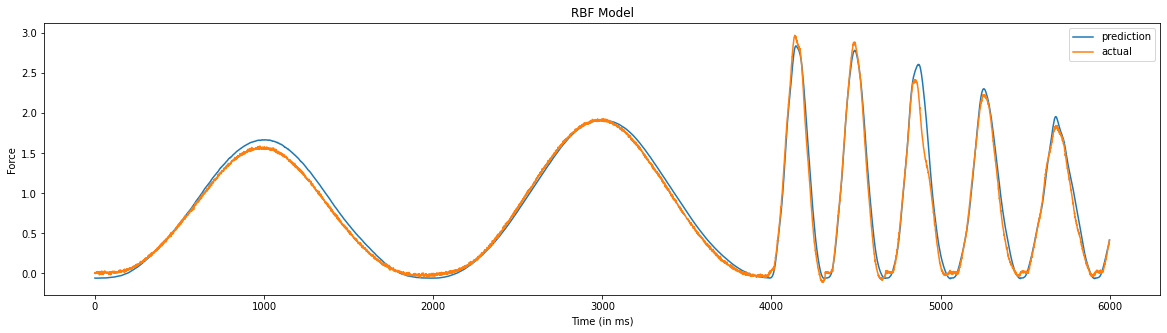

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),f1_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('RBF Model')
plt.show()

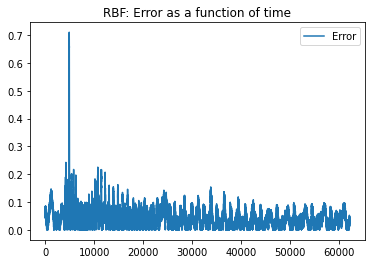

In [ ]:
error5 = []
for i in range(len(f1_test)):
    error5.append(abs(y1_pred[i]-f1_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error5, label = 'Error')
plt.legend()
plt.title('RBF: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])

Minimum Error = 6.496257551891205e-07
Maximum Error = 0.7102470566059043
Median Value of Error = 0.03496230200391709


### Deep Learning

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((2))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 27        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
t3 = datetime.now()
his = model.fit(X_train,f1_train, epochs=15)
t4 = datetime.now()
print('Time taken by Deep Learning Model',t4-t3)

Epoch 1/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0521
Epoch 2/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0130
Epoch 3/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0103
Epoch 4/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0089
Epoch 5/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0083
Epoch 6/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0079
Epoch 7/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0076
Epoch 8/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0073
Epoch 9/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0071
Epoch 10/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0068
Epoch 11/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0067
Epoch 12/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0067
E

In [ ]:
y1_pred = model.predict(X_test)
print('Root mean square error: ',sqrt(mean_squared_error(f1_test,y1_pred)))

Root mean square error:  0.06261452781587554


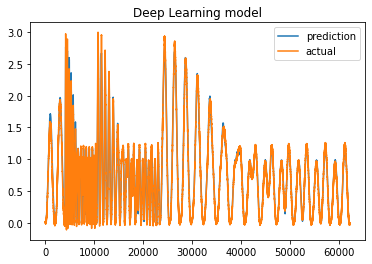

In [ ]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),f1_test, label = 'actual')
plt.legend()
plt.title('Deep Learning model')
plt.show()

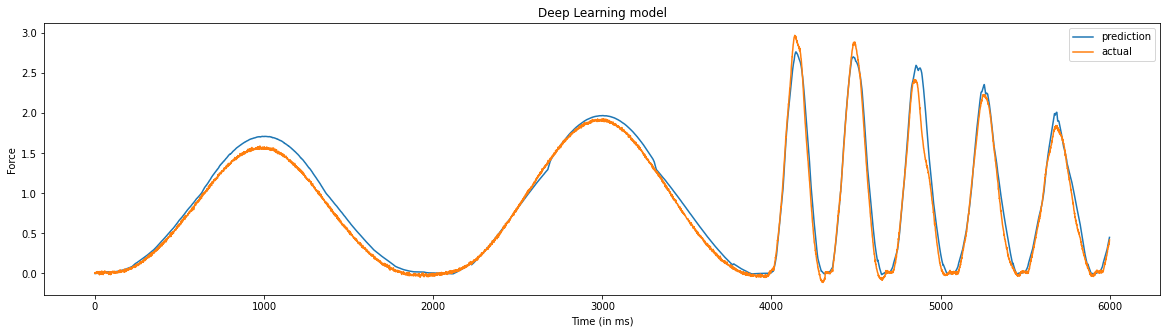

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),f1_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

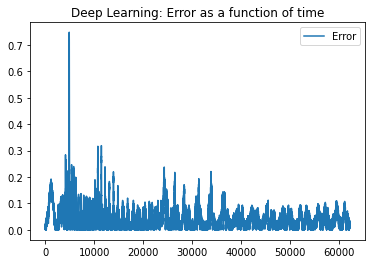

In [ ]:
error2 = []
for i in range(len(f1_test)):
    error2.append(abs(y1_pred[i]-f1_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Deep Learning: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error2))
print('Maximum Error =',max(error2))
error3 = sorted(error2)
print('Median Value of Error =',error3[len(error)//2])

Minimum Error = [4.172325e-07]
Maximum Error = [0.7473837]
Median Value of Error = [0.03337055]


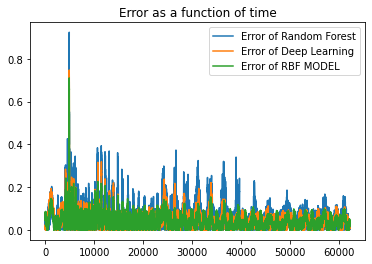

In [ ]:
plt.plot(list(range(len(y1_pred))),error, label = 'Error of Random Forest')
plt.plot(list(range(len(y1_pred))),error2, label = 'Error of Deep Learning')
plt.plot(list(range(len(y1_pred))),error5, label = 'Error of RBF MODEL')
plt.legend()
plt.title('Error as a function of time')
plt.show()

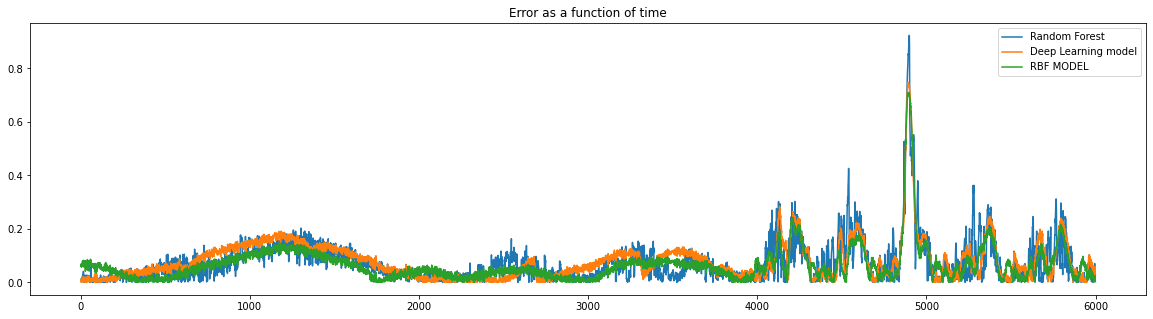

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),error[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),error2[:6000], label = 'Deep Learning model')
plt.plot(list(range(6000)),error5[:6000], label = 'RBF MODEL')
plt.legend()
plt.title('Error as a function of time')
plt.show()

# Using past inputs
t = 1

In [ ]:
l1 = len(X_train)
l2 = len(X_test)
x_train = [[0 for _ in range(6)] for _ in range(l1-2)]
x_test = [[0 for _ in range(6)] for _ in range(l2-2)]

for i in range(l1-2):
    for j in range(3):
        x_train[i][j]=X_train.iloc[2+i-j,0]
        x_train[i][j+3]=X_train.iloc[2+i-j,1]

print(x_train[:5])
y_train = f1_train.iloc[2:]

for i in range(l2-2):
    for j in range(3):
        x_test[i][j]=X_test.iloc[2+i-j,0]
        x_test[i][j+3]=X_test.iloc[2+i-j,1]
y_test = f1_test.iloc[2:]


[[-0.0159, -0.0159, -0.0, 0.0171, -0.0, -0.0], [-0.0159, -0.0159, -0.0159, 0.0171, 0.0171, -0.0], [-0.0, -0.0159, -0.0159, 0.0329, 0.0171, 0.0171], [0.0158, -0.0, -0.0159, 0.0499, 0.0329, 0.0171], [0.0316, 0.0158, -0.0, 0.0657, 0.0499, 0.0329]]


In [ ]:
print(len(x_test),len(y_test))

62209 62209


In [ ]:
x_train,x_test = np.array(x_train),np.array(x_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by Random Forest',t2-t1)

Time taken by Random Forest 0:01:12.459943


In [ ]:
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

Root Mean Squared error of Random Forest 0.06256906194768569


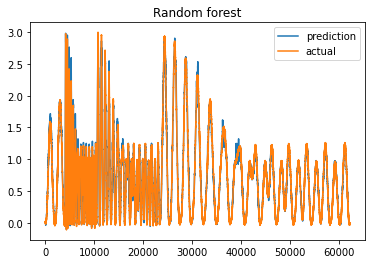

In [ ]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),y_test, label = 'actual')
plt.legend()
plt.title('Random forest')
plt.show()

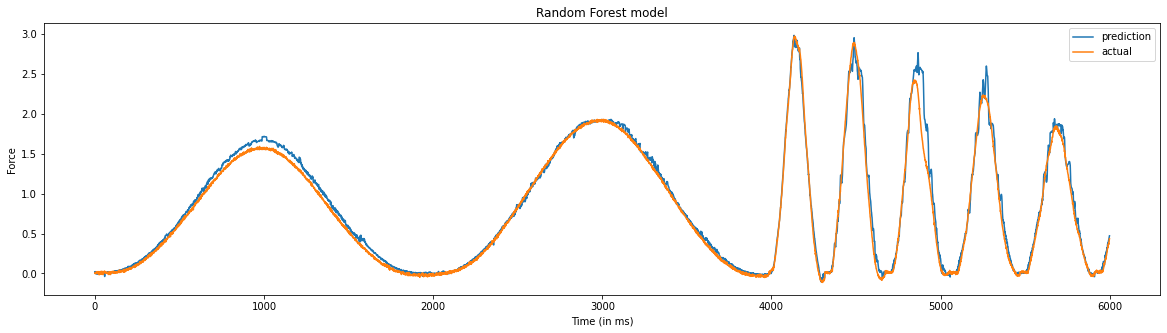

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Random Forest model')
plt.show()

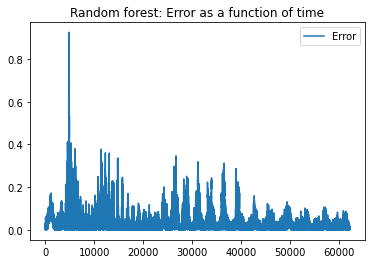

In [ ]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])

Minimum Error = 3.333333331578814e-07
Maximum Error = 0.925461000000001
Median Value of Error = 0.021228999999999776


[0.5454766  0.00359572 0.00286846 0.08370761 0.09811493 0.26623668]


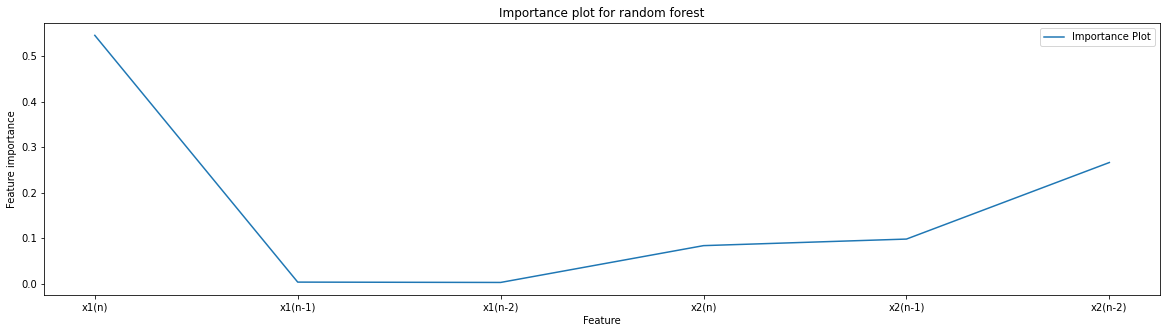

In [ ]:
importances = rf.feature_importances_
print(importances)
plt.figure(figsize=(20,5))
x_plot = ['x1(n)','x1(n-1)','x1(n-2)','x2(n)','x2(n-1)','x2(n-2)']
plt.plot(x_plot,importances, label = 'Importance Plot')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.title('Importance plot for random forest')
plt.show()

# RBF Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
t1 = datetime.now()
clf = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))
clf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by RBF Model: ',t2-t1)

Time taken by RBF Model:  0:00:45.367985


In [ ]:
y1_pred = clf.predict(x_test)
print('Root mean square error: ',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean square error:  0.051910430355799196


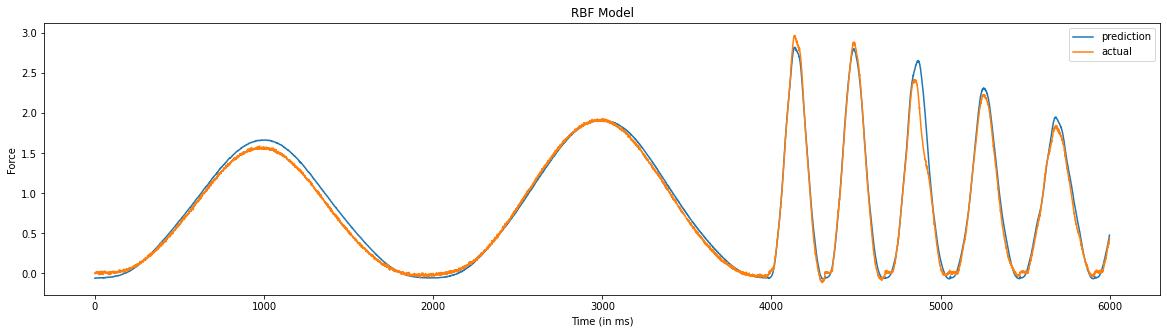

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('RBF Model')
plt.show()

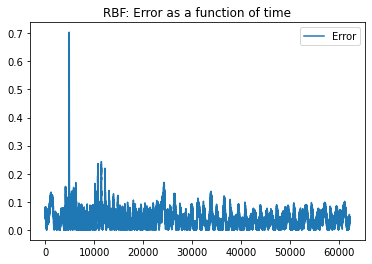

In [ ]:
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error5, label = 'Error')
plt.legend()
plt.title('RBF: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])

Minimum Error = 1.038162159572309e-06
Maximum Error = 0.7035003039697945
Median Value of Error = 0.03284668370934655


# Deep Learning Model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((6))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_4 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
t3 = datetime.now()
his = model.fit(x_train,y_train, epochs=15)
t4 = datetime.now()
print('Time taken by Deep Learning Model',t4-t3)

Epoch 1/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0785
Epoch 2/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0173
Epoch 3/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0135
Epoch 4/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0113
Epoch 5/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0099
Epoch 6/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0093
Epoch 7/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0087
Epoch 8/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0084
Epoch 9/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0083
Epoch 10/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0080
Epoch 11/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0081
Epoch 12/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0079
E

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [ ]:
y1_pred = model.predict(x_test)
print('Root mean squared error:',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean squared error: 0.0477038705710301


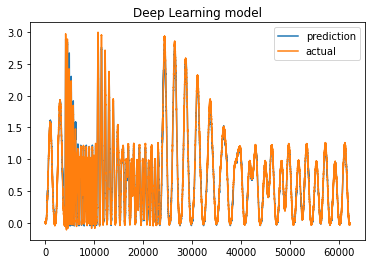

In [ ]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),y_test, label = 'actual')
plt.legend()
plt.title('Deep Learning model')
plt.show()

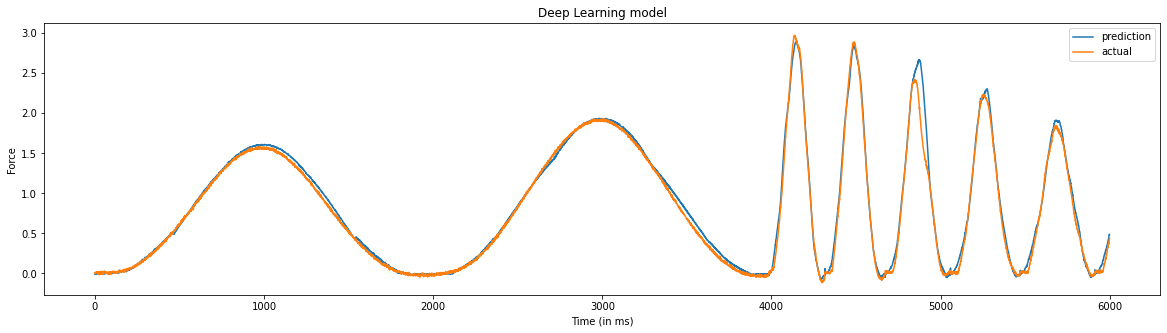

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

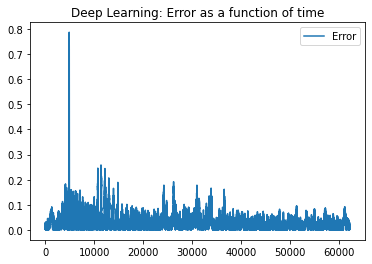

In [ ]:
error2 = []
for i in range(len(y_test)):
    error2.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Deep Learning: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error2))
print('Maximum Error =',max(error2))
error3 = sorted(error2)
print('Median Value of Error =',error3[len(error)//2])

Minimum Error = [2.0861626e-07]
Maximum Error = [0.78711116]
Median Value of Error = [0.02213359]


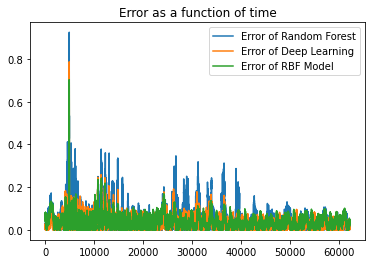

In [ ]:
plt.plot(list(range(len(y1_pred))),error, label = 'Error of Random Forest')
plt.plot(list(range(len(y1_pred))),error2, label = 'Error of Deep Learning')
plt.plot(list(range(len(y1_pred))),error5, label = 'Error of RBF Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()

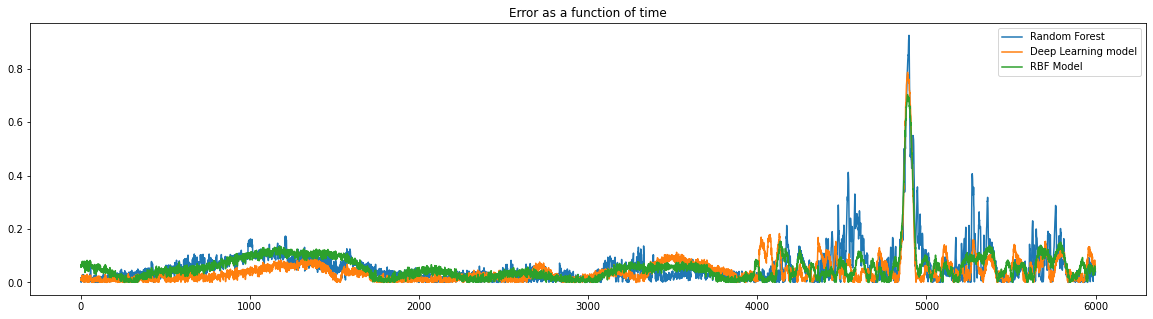

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),error[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),error2[:6000], label = 'Deep Learning model')
plt.plot(list(range(6000)),error5[:6000], label = 'RBF Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()

# Input Feature : past inputs

x1(n), x1(n-t), x1(n-2t), x2(n), x2(n-t), x2(n-2t)

t = 2

In [ ]:
l1 = len(X_train)
l2 = len(X_test)
x_train = [[0 for _ in range(6)] for _ in range(l1-4)]
x_test = [[0 for _ in range(6)] for _ in range(l2-4)]

for i in range(l1-4):
    for j in range(3):
        x_train[i][j]=X_train.iloc[4+i-2*j,0]
        x_train[i][j+3]=X_train.iloc[4+i-2*j,1]

print(x_train[:5])
y_train = f1_train.iloc[4:]

for i in range(l2-4):
    for j in range(3):
        x_test[i][j]=X_test.iloc[4+i-2*j,0]
        x_test[i][j+3]=X_test.iloc[4+i-2*j,1]
y_test = f1_test.iloc[4:]
print(len(x_test),len(y_test))

[[-0.0, -0.0159, -0.0, 0.0329, 0.0171, -0.0], [0.0158, -0.0159, -0.0159, 0.0499, 0.0171, -0.0], [0.0316, -0.0, -0.0159, 0.0657, 0.0329, 0.0171], [0.0485, 0.0158, -0.0159, 0.0815, 0.0499, 0.0171], [0.0802, 0.0316, -0.0, 0.1131, 0.0657, 0.0329]]
62207 62207


In [ ]:
x_train,x_test = np.array(x_train),np.array(x_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by Random Forest',t2-t1)

Time taken by Random Forest 0:01:11.611292


In [ ]:
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

Root Mean Squared error of Random Forest 0.06124848099788496


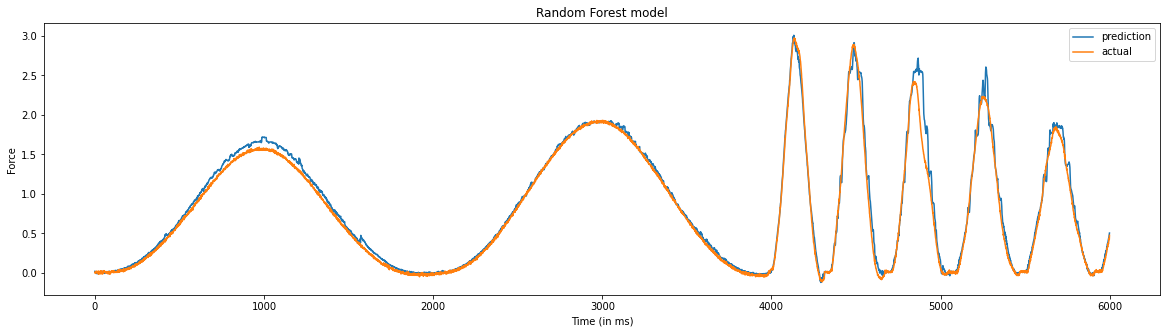

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Random Forest model')
plt.show()

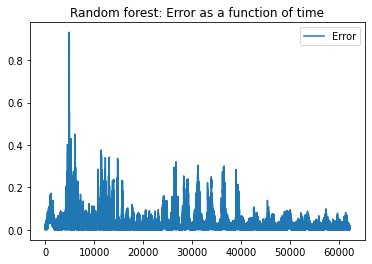

In [ ]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])

Minimum Error = 2.833333334062438e-07
Maximum Error = 0.931277833333336
Median Value of Error = 0.019546121428571483


[0.54727983 0.00210017 0.00270712 0.10783561 0.0979529  0.24212437]


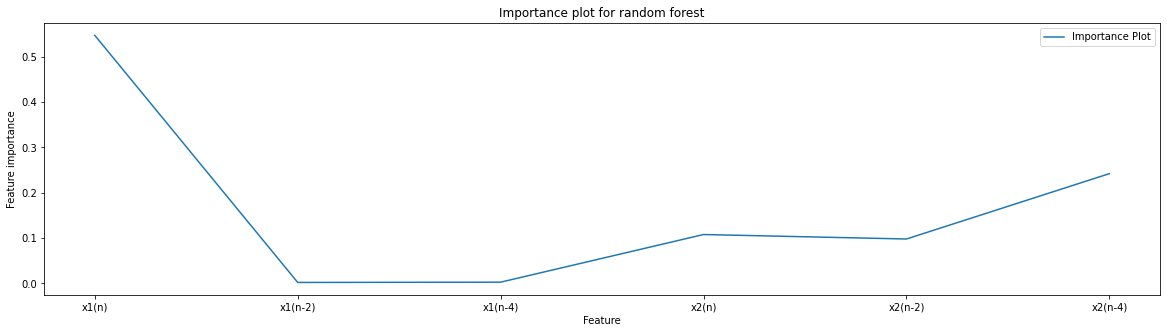

In [ ]:
importances = rf.feature_importances_
print(importances)
plt.figure(figsize=(20,5))
x_plot = ['x1(n)','x1(n-2)','x1(n-4)','x2(n)','x2(n-2)','x2(n-4)']
plt.plot(x_plot,importances, label = 'Importance Plot')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.title('Importance plot for random forest')
plt.show()

# RBF Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
t1 = datetime.now()
clf = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))
clf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by RBF Model: ',t2-t1)

Time taken by RBF Model:  0:00:33.166087


In [ ]:
y1_pred = clf.predict(x_test)
print('Root mean square error: ',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean square error:  0.052229884361111985


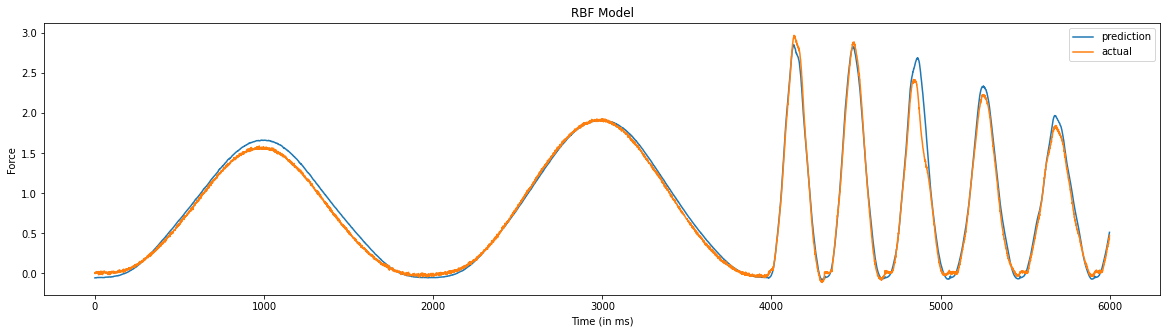

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('RBF Model')
plt.show()

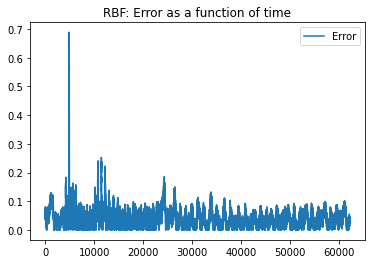

In [ ]:
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error5, label = 'Error')
plt.legend()
plt.title('RBF: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])

Minimum Error = 4.945539788803188e-08
Maximum Error = 0.6888342849592173
Median Value of Error = 0.03268404620054577


## Deep Learning Model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((6))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_7 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
t3 = datetime.now()
his = model.fit(x_train,y_train, epochs=15)
t4 = datetime.now()
print('Time taken by Deep Learning Model',t4-t3)

Epoch 1/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0074
Epoch 2/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0069
Epoch 3/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0067
Epoch 4/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0064
Epoch 5/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0060
Epoch 6/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0063
Epoch 7/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0059
Epoch 8/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0061
Epoch 9/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0058
Epoch 10/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0055
Epoch 11/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0057
Epoch 12/15
3515/3515 [==============================] - 4s 1ms/step - loss: 0.0056
E

In [ ]:
y1_pred = model.predict(x_test)
print('Root mean squared error:',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean squared error: 0.06989726088661952


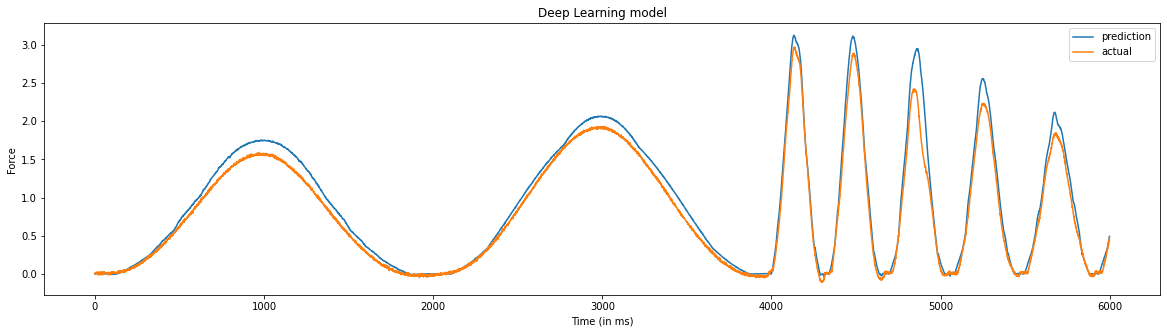

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

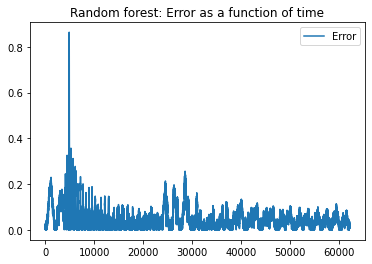

In [ ]:
error2 = []
for i in range(len(y_test)):
    error2.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error2))
print('Maximum Error =',max(error2))
error3 = sorted(error3)
print('Median Value of Error =',error3[len(error)//2])

Minimum Error = [1.7136335e-06]
Maximum Error = [0.86409414]
Median Value of Error = [0.02213359]


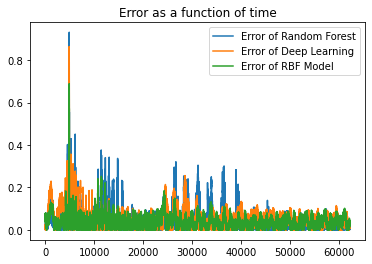

In [ ]:
plt.plot(list(range(len(y1_pred))),error, label = 'Error of Random Forest')
plt.plot(list(range(len(y1_pred))),error2, label = 'Error of Deep Learning')
plt.plot(list(range(len(y1_pred))),error5, label = 'Error of RBF Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()

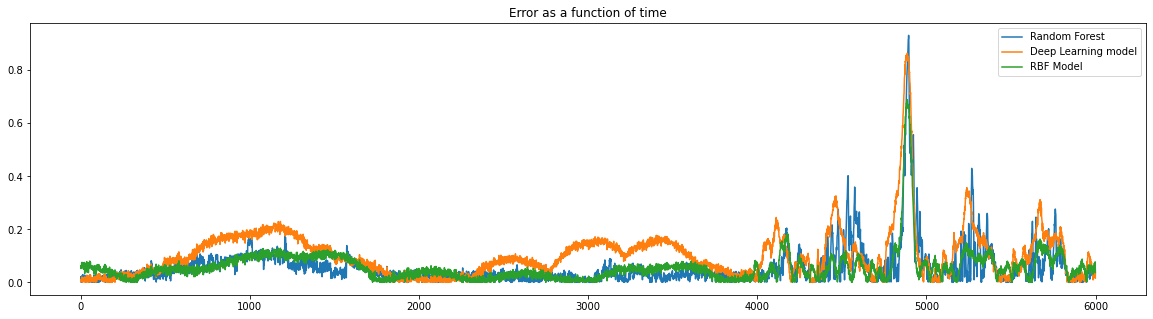

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),error[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),error2[:6000], label = 'Deep Learning model')
plt.plot(list(range(6000)),error5[:6000], label = 'RBF Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()

# Input Feature : 5 past inputs

x1(n), x1(n-t), x1(n-2t), x1(n-3t) x1(n-4t), x2(n), x2(n-t), x2(n-2t), x2(n-3t), x2(n-4t)

t = 2

In [ ]:
l1 = len(X_train)
l2 = len(X_test)
x_train = [[0 for _ in range(10)] for _ in range(l1-8)]
x_test = [[0 for _ in range(10)] for _ in range(l2-8)]

for i in range(l1-8):
    for j in range(5):
        x_train[i][j]=X_train.iloc[8+i-2*j,0]
        x_train[i][j+5]=X_train.iloc[8+i-2*j,1]

print(x_train[:5])
y_train = f1_train.iloc[8:]

for i in range(l2-8):
    for j in range(3):
        x_test[i][j]=X_test.iloc[8+i-2*j,0]
        x_test[i][j+5]=X_test.iloc[8+i-2*j,1]
y_test = f1_test.iloc[8:]
print(len(x_test),len(y_test))

[[0.0802, 0.0316, -0.0, -0.0159, -0.0, 0.1131, 0.0657, 0.0329, 0.0171, -0.0], [0.1118, 0.0485, 0.0158, -0.0159, -0.0159, 0.1447, 0.0815, 0.0499, 0.0171, -0.0], [0.1435, 0.0802, 0.0316, -0.0, -0.0159, 0.1921, 0.1131, 0.0657, 0.0329, 0.0171], [0.1752, 0.1118, 0.0485, 0.0158, -0.0159, 0.2237, 0.1447, 0.0815, 0.0499, 0.0171], [0.2227, 0.1435, 0.0802, 0.0316, -0.0, 0.2711, 0.1921, 0.1131, 0.0657, 0.0329]]
62203 62203


In [ ]:
x_train,x_test = np.array(x_train),np.array(x_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by Random Forest',t2-t1)

Time taken by Random Forest 0:01:56.458738


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

Root Mean Squared error of Random Forest 0.09221858045504519


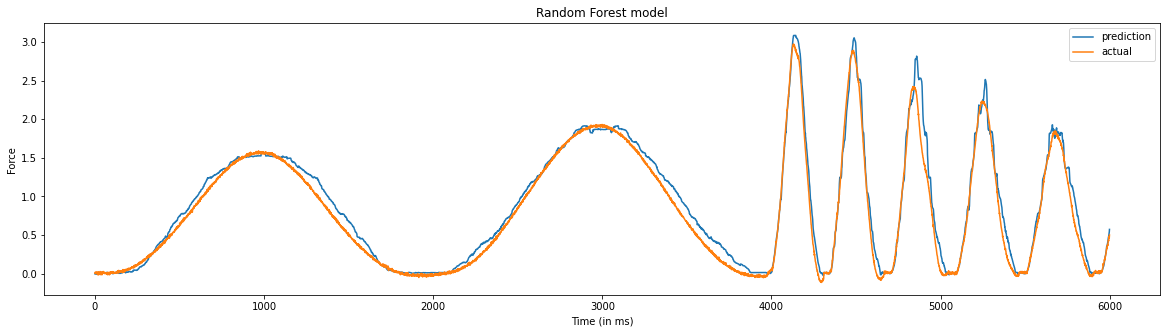

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Random Forest model')
plt.show()

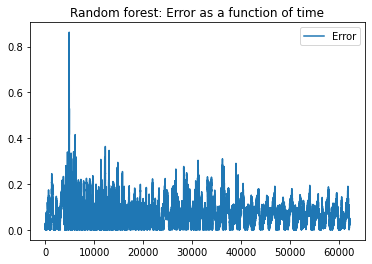

In [ ]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])

Minimum Error = 3.333333338240152e-07
Maximum Error = 0.862438499999999
Median Value of Error = 0.06472858333333333


[5.45525072e-01 3.05146312e-03 1.13527534e-03 4.57348299e-04
 1.33855737e-03 9.29463010e-02 6.17328829e-02 7.63640689e-02
 9.44402119e-02 1.23008820e-01]


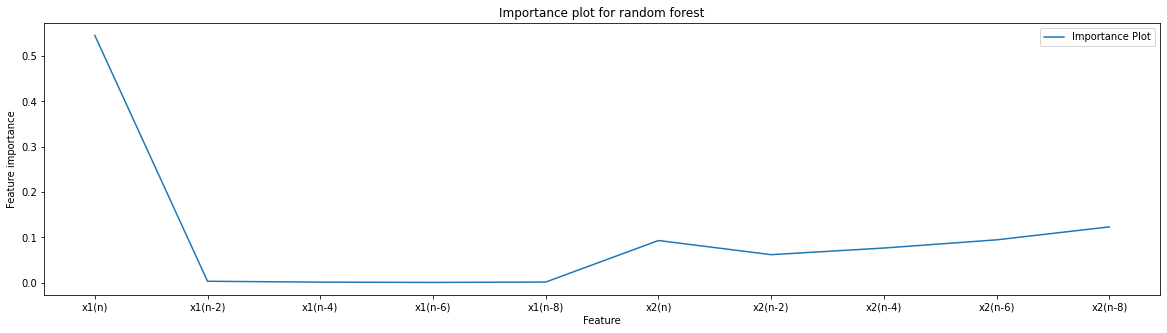

In [ ]:
importances = rf.feature_importances_
print(importances)
plt.figure(figsize=(20,5))
x_plot = ['x1(n)','x1(n-2)','x1(n-4)','x1(n-6)','x1(n-8)','x2(n)','x2(n-2)','x2(n-4)','x2(n-6)','x2(n-8)']
plt.plot(x_plot,importances, label = 'Importance Plot')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.title('Importance plot for random forest')
plt.show()

# RBF Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
t1 = datetime.now()
clf = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))
clf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by RBF Model: ',t2-t1)

Time taken by RBF Model:  0:00:34.475567


In [ ]:
y1_pred = clf.predict(x_test)
print('Root mean square error: ',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean square error:  0.7779706535343228


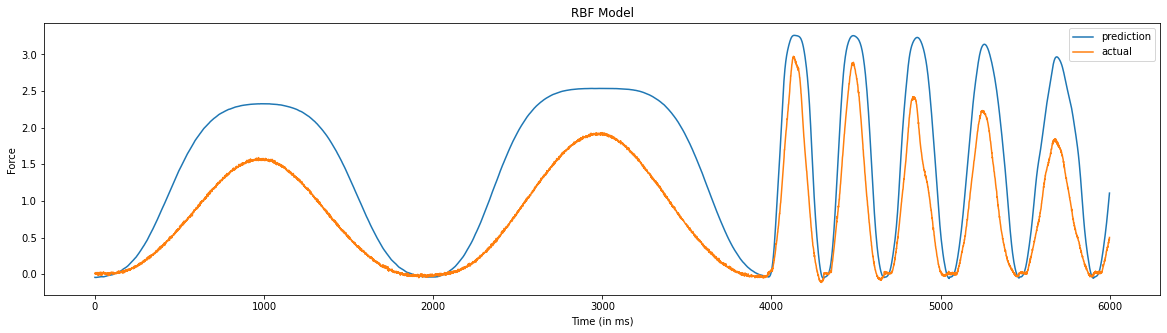

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('RBF Model')
plt.show()

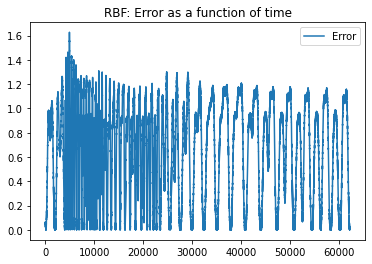

In [ ]:
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error5, label = 'Error')
plt.legend()
plt.title('RBF: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])

Minimum Error = 7.775360182040239e-06
Maximum Error = 1.6269486821274375
Median Value of Error = 0.7871917465534608


## Deep Learning Model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((10))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 99        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
t3 = datetime.now()
his = model.fit(x_train,y_train, epochs=15)
t4 = datetime.now()
print('Time taken by Deep Learning Model',t4-t3)

Epoch 1/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0654
Epoch 2/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0220
Epoch 3/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0192
Epoch 4/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0166
Epoch 5/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0145
Epoch 6/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0141
Epoch 7/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0122
Epoch 8/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0111
Epoch 9/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0099
Epoch 10/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0091
Epoch 11/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0088
Epoch 12/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.0083
E

In [ ]:
y1_pred = model.predict(x_test)
print('Root mean squared error:',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean squared error: 3.400057485138764


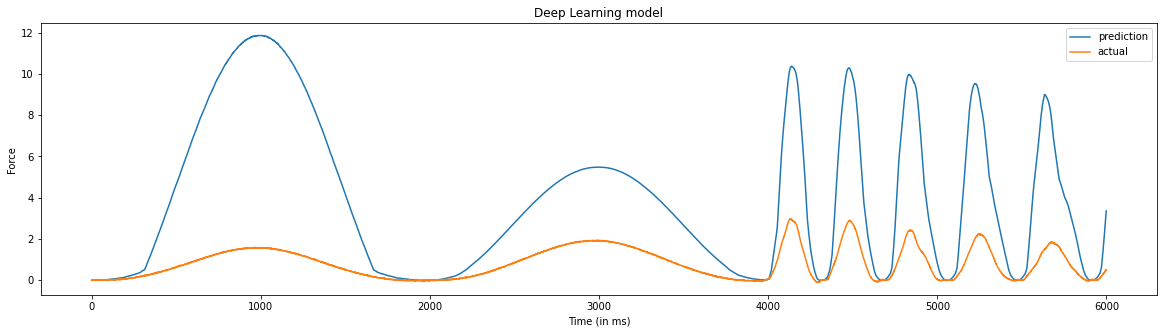

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

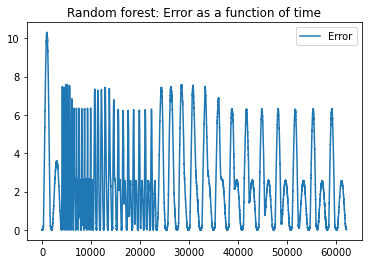

In [ ]:
error2 = []
for i in range(len(y_test)):
    error2.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error2))
print('Maximum Error =',max(error2))
error3 = sorted(error2)
print('Median Value of Error =',error3[len(error)//2])

Minimum Error = [6.603077e-06]
Maximum Error = [10.308683]
Median Value of Error = [2.0383384]


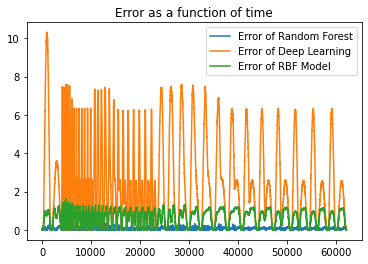

In [ ]:
plt.plot(list(range(len(y1_pred))),error, label = 'Error of Random Forest')
plt.plot(list(range(len(y1_pred))),error2, label = 'Error of Deep Learning')
plt.plot(list(range(len(y1_pred))),error5, label = 'Error of RBF Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()

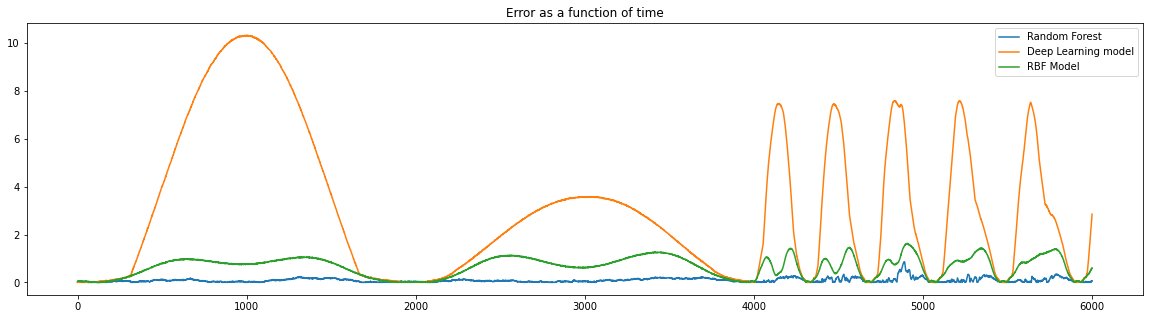

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),error[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),error2[:6000], label = 'Deep Learning model')
plt.plot(list(range(6000)),error5[:6000], label = 'RBF Model')
plt.legend()
plt.title('Error as a function of time')
plt.show()

# Considering velocity as input feature (fractional derivative) dx/dt

In [ ]:
l1 = len(X_train)
l2 = len(X_test)

v_train = [[0 for _ in range(2)] for _ in range(l1-1)]
v_test = [[0 for _ in range(2)] for _ in range(l2-1)]

for i in range(l1-1):
    v_train[i][0],v_train[i][1] = X_train.iloc[i+1,0]-X_train.iloc[i,0],X_train.iloc[i+1,1]-X_train.iloc[i,1]

for i in range(l2-1):
    v_test[i][0],v_test[i][1] = X_test.iloc[i+1,0]-X_test.iloc[i,0],X_test.iloc[i+1,1]-X_test.iloc[i,1]

y_train = f1_train.iloc[1:]
y_test = f1_test.iloc[1:]
print(len(v_test),len(y_test))

62210 62210


In [ ]:
v_train,v_test = np.array(v_train),np.array(v_test)
print(v_train[:5])
print(len(v_train),len(y_train))

[[-0.0159  0.    ]
 [ 0.      0.0171]
 [ 0.      0.    ]
 [ 0.0159  0.0158]
 [ 0.0158  0.017 ]]
112458 112458


In [ ]:
x_train,x_test = [[0 for _ in range(20)] for _ in range(l1-1)],[[0 for _ in range(20)] for _ in range(l2-1)]
for i in range(l1-1):
    for j in range(10):
        x_train[i][j],x_train[i][j+10]=abs(1000*v_train[i][0])**((j+1)/10),abs(1000*v_train[i][1])**((j+1)/10)

for i in range(l2-1):
    for j in range(10):
        x_test[i][j],x_test[i][j+10]=abs(1000*v_test[i][0])**((j+1)/10),abs(1000*v_test[i][1])**((j+1)/10)
x_train[:5]

In [ ]:
x_train,x_test = np.array(x_train),np.array(x_test)

In [ ]:
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()

print('Time taken by Random Forest',t2-t1)

Time taken by Random Forest 0:00:32.556166


In [ ]:
from sklearn.metrics import mean_squared_error
y1_pred = rf.predict(x_test)
print('Mean Squared error of Random Forest',mean_squared_error(y_test,y1_pred))

Mean Squared error of Random Forest 0.5483031875248192


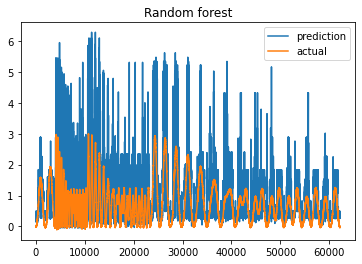

In [ ]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),y_test, label = 'actual')
plt.legend()
plt.title('Random forest')
plt.show()

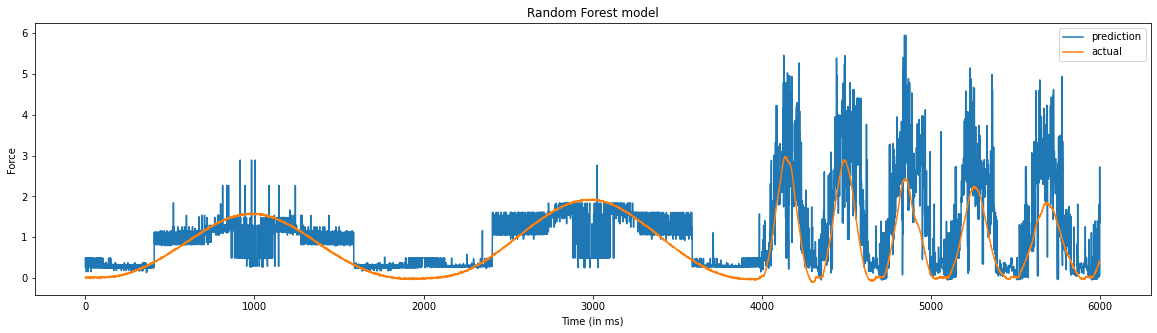

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Random Forest model')
plt.show()

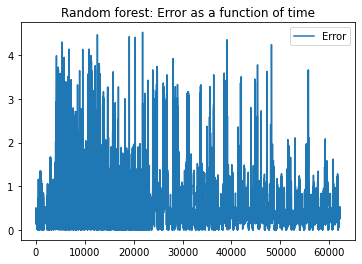

In [ ]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])

Minimum Error = 5.004761905014199e-06
Maximum Error = 4.527912908485863
Median Value of Error = 0.35033130606294394


[0.05528145 0.05259156 0.0534866  0.05593052 0.0554552  0.05811035
 0.05665933 0.0493998  0.05145367 0.05351461 0.04362075 0.05080207
 0.04373957 0.04866978 0.04448057 0.04031408 0.04616888 0.04235379
 0.04383767 0.05412974]


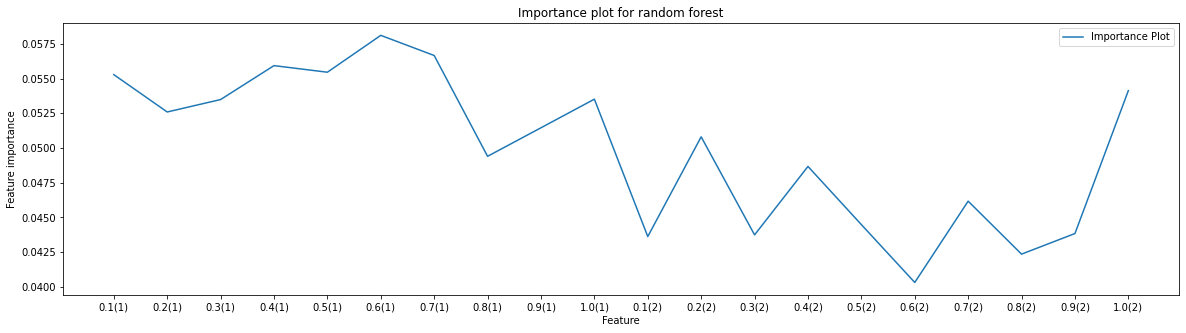

In [ ]:
importances = rf.feature_importances_
print(importances)
plt.figure(figsize=(20,5))
x_plot = [str((i+1)/10)+'(1)' for i in range(10)]+[str((i+1)/10)+'(2)' for i in range(10)]
plt.plot(x_plot,importances, label = 'Importance Plot')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.title('Importance plot for random forest')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((20))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 189       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
t3 = datetime.now()
his = model.fit(x_train,y_train, epochs=15)
t4 = datetime.now()
print('Time taken by Deep Learning Model',t4-t3)

Epoch 1/15
3515/3515 [==============================] - 6s 1ms/step - loss: 1.6528
Epoch 2/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9346
Epoch 3/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9316
Epoch 4/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9233
Epoch 5/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9210
Epoch 6/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9200
Epoch 7/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9186
Epoch 8/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9171
Epoch 9/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9151
Epoch 10/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9118
Epoch 11/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9098
Epoch 12/15
3515/3515 [==============================] - 5s 1ms/step - loss: 0.9099
E

In [ ]:
y1_pred = model.predict(x_test)
print(mean_squared_error(y_test,y1_pred))

0.39842286392226883


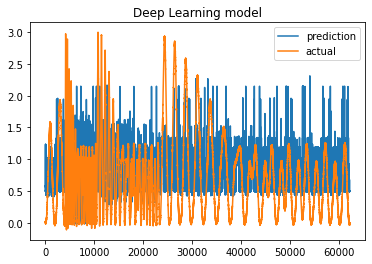

In [ ]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),y_test, label = 'actual')
plt.legend()
plt.title('Deep Learning model')
plt.show()

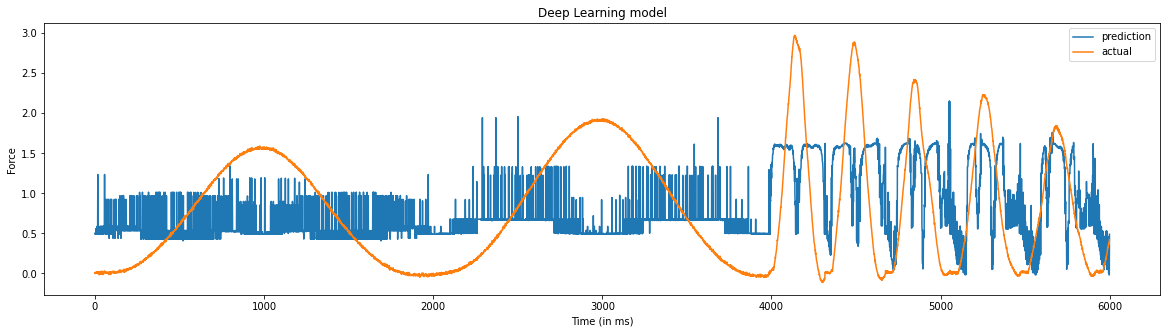

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

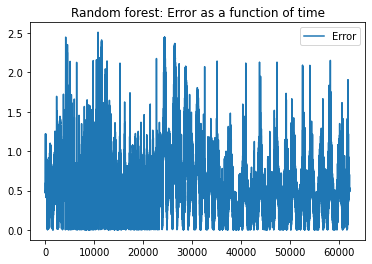

In [ ]:
error2 = []
for i in range(len(y_test)):
    error2.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

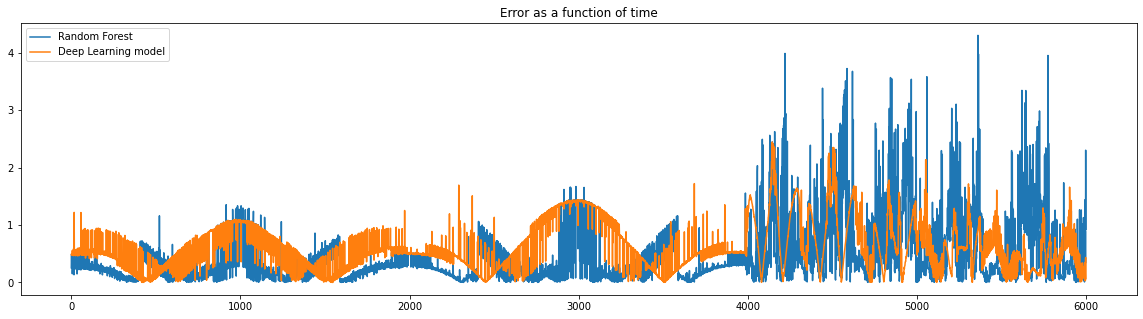

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),error[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),error2[:6000], label = 'Deep Learning model')
plt.legend()
plt.title('Error as a function of time')
plt.show()